# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** [Stanislaus Matthew Sutandang]
- **Email:** [matthewsutandang.tren@gmail.com]
- **ID Dicoding:** [stanislaus_matthew]

## Menentukan Pertanyaan Bisnis

1. How do PM2.5 and PM10 concentrations compare between the two locations? 
2. What are the relationships between weather factors and pollutant concentrations?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency

## Data Wrangling

### Gathering Data

In [10]:
df_wanliu = pd.read_csv('DATA/PRSA_Data_Wanliu_20130301-20170228.csv')
df_wanshouxigong = pd.read_csv('DATA/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

# Preview the data
print(df_wanliu.head())
print(df_wanshouxigong.head())


   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu  
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  20

**Insight:**
- The code you provided imports two CSV files containing air quality data for two locations: Wanliu and Wanshouxigong. The pd.read_csv() function reads the data from the CSV files into pandas DataFrames named df_wanliu and df_wanshouxigong.

### Assessing Data

In [11]:
# Check for missing values and data types
print(df_wanliu.info())
print(df_wanshouxigong.info())

# Check for null values
print(df_wanliu.isnull().sum())
print(df_wanshouxigong.isnull().sum())

# Descriptive statistics
print(df_wanliu.describe())
print(df_wanshouxigong.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries

**Insight:**
- df_wanliu.info() and df_wanshouxigong.info(): These commands display the structure of the DataFrame, showing the number of entries, data types, and non-null counts for each column.
- Checking for missing values: df_wanliu.isnull().sum() and df_wanshouxigong.isnull().sum() display the number of null (missing) values in each column.
- Descriptive statistics: df_wanliu.describe() and df_wanshouxigong.describe() show key statistical metrics such as mean, min, max, and standard deviation for numerical columns.

### Cleaning Data

In [13]:
# Filling missing values for weather-related columns with forward fill
df_wanliu.fillna(method='ffill', inplace=True)
df_wanshouxigong.fillna(method='ffill', inplace=True)

# Drop any remaining nulls in critical columns (e.g., pollutants)
df_wanliu.dropna(subset=['PM2.5', 'PM10'], inplace=True)
df_wanshouxigong.dropna(subset=['PM2.5', 'PM10'], inplace=True)

# Convert year, month, day, hour into datetime object
df_wanliu['datetime'] = pd.to_datetime(df_wanliu[['year', 'month', 'day', 'hour']])
df_wanshouxigong['datetime'] = pd.to_datetime(df_wanshouxigong[['year', 'month', 'day', 'hour']])


C:\Users\PEMUDA PANCASILA\AppData\Local\Temp\ipykernel_21120\1259078836.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wanliu.fillna(method='ffill', inplace=True)
C:\Users\PEMUDA PANCASILA\AppData\Local\Temp\ipykernel_21120\1259078836.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wanshouxigong.fillna(method='ffill', inplace=True)


**Insight:**
- fillna(method='ffill') fills missing values by carrying forward the last valid data point. This method is useful for weather-related data where missing values can be filled with previous values.
- dropna(subset=['PM2.5', 'PM10']) removes rows where critical pollutant data (PM2.5 and PM10) are missing to ensure analysis integrity.
- Combines year, month, day, and hour columns into a single datetime object to allow easier time-based analysis.

## Exploratory Data Analysis (EDA)

### Explore ...

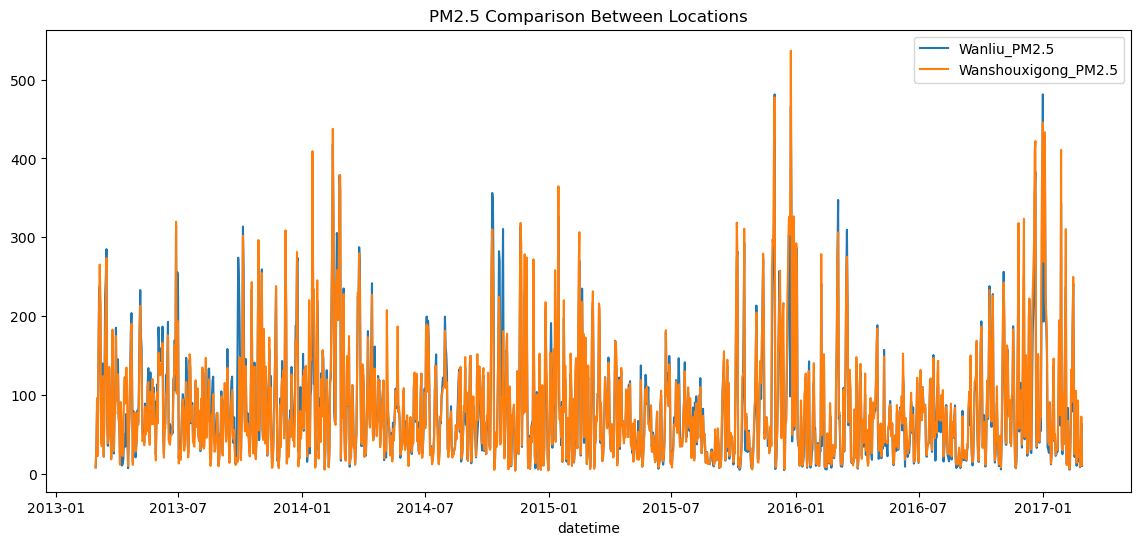

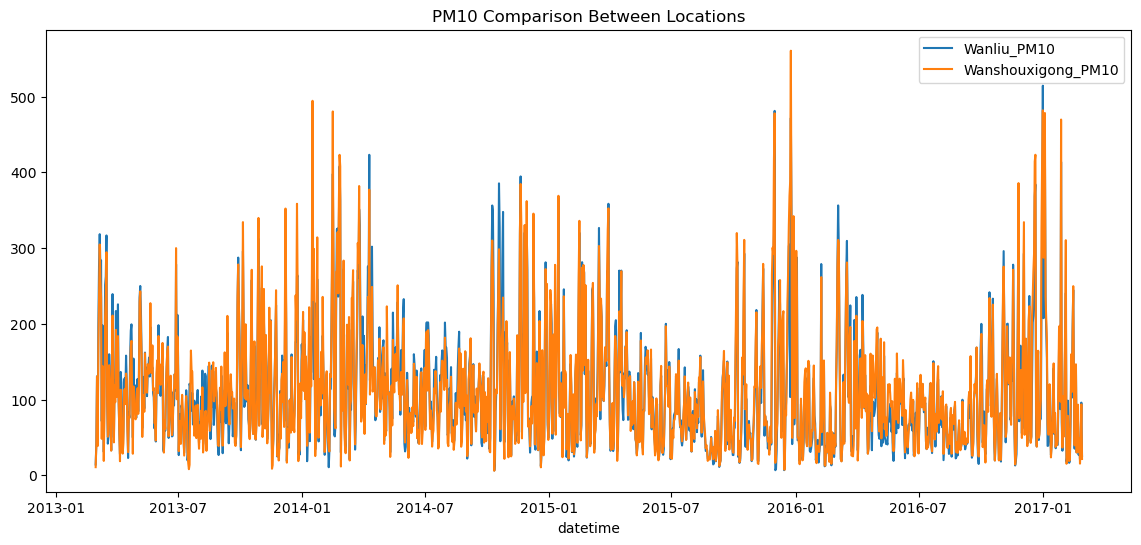

In [14]:
# Daily averages for PM2.5 and PM10
df_wanliu_daily = df_wanliu.groupby(df_wanliu['datetime'].dt.date)[['PM2.5', 'PM10']].mean()
df_wanshouxigong_daily = df_wanshouxigong.groupby(df_wanshouxigong['datetime'].dt.date)[['PM2.5', 'PM10']].mean()

# Combine datasets
df_combined = pd.concat([df_wanliu_daily, df_wanshouxigong_daily], axis=1, keys=['Wanliu', 'Wanshouxigong'])
df_combined.columns = ['Wanliu_PM2.5', 'Wanliu_PM10', 'Wanshouxigong_PM2.5', 'Wanshouxigong_PM10']

# Visualize comparison of PM2.5 levels over time
df_combined[['Wanliu_PM2.5', 'Wanshouxigong_PM2.5']].plot(figsize=(14, 6), title="PM2.5 Comparison Between Locations")
plt.show()

# Visualize comparison of PM10 levels over time
df_combined[['Wanliu_PM10', 'Wanshouxigong_PM10']].plot(figsize=(14, 6), title="PM10 Comparison Between Locations")
plt.show()


**Insight:**
- The code groups the data by datetime to compute daily averages for both PM2.5 and PM10 levels at Wanliu and Wanshouxigong.
- The daily average values from both locations are concatenated into a single DataFrame (df_combined), making it easier to compare air quality metrics between the two locations.
- The code plots PM2.5 and PM10 levels over time for both locations to visually compare trends in pollutant concentrations. This helps identify patterns or discrepancies in air quality.

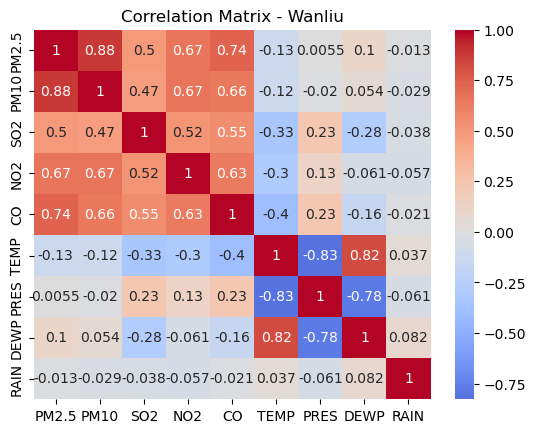

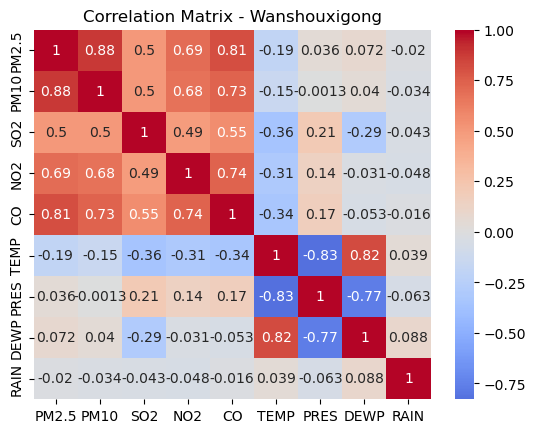

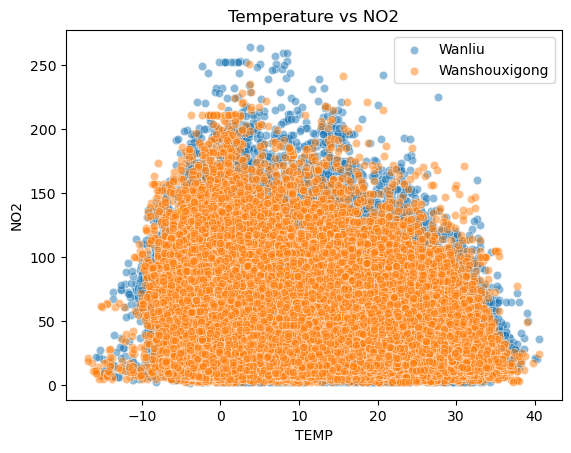

In [15]:
# Correlation heatmap for Wanliu
corr_wanliu = df_wanliu[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
sns.heatmap(corr_wanliu, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Wanliu')
plt.show()

# Correlation heatmap for Wanshouxigong
corr_wanshouxigong = df_wanshouxigong[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
sns.heatmap(corr_wanshouxigong, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Wanshouxigong')
plt.show()

# Scatter plot showing the relationship between temperature and NO2 levels
sns.scatterplot(data=df_wanliu, x='TEMP', y='NO2', label='Wanliu', alpha=0.5)
sns.scatterplot(data=df_wanshouxigong, x='TEMP', y='NO2', label='Wanshouxigong', alpha=0.5)
plt.title("Temperature vs NO2")
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

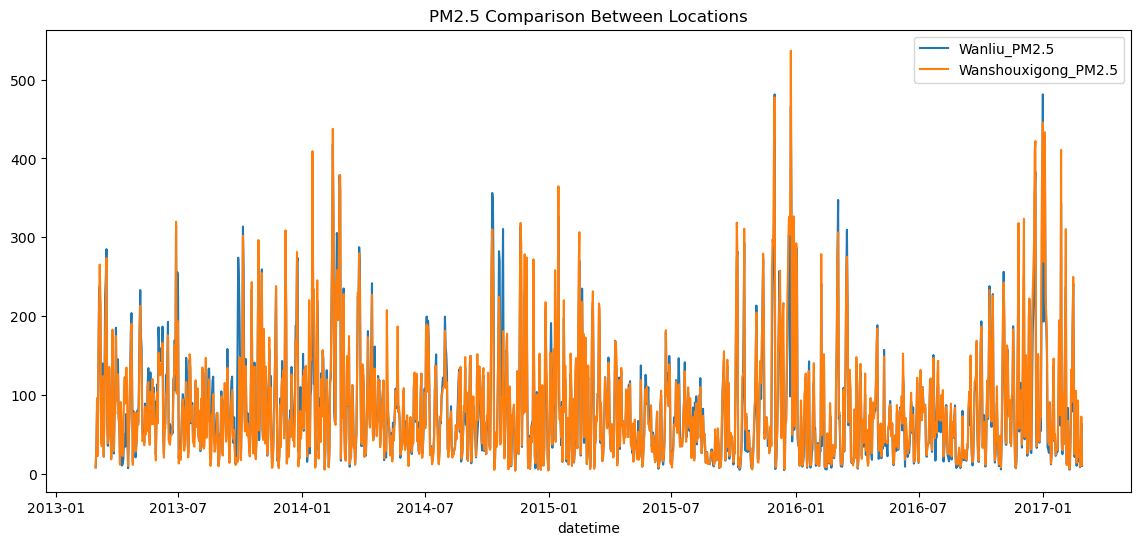

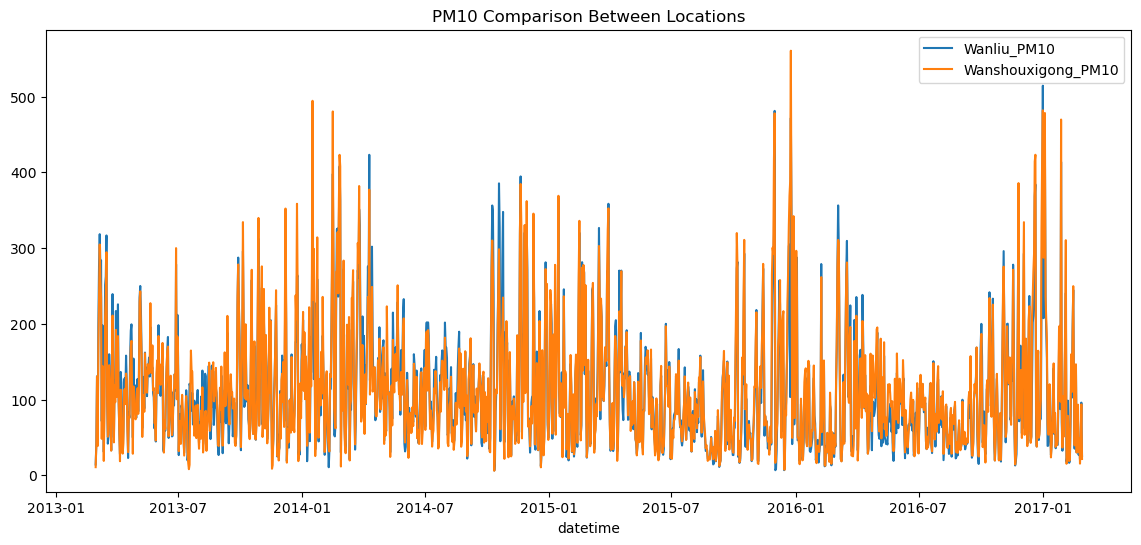

In [18]:
df_combined[['Wanliu_PM2.5', 'Wanshouxigong_PM2.5']].plot(figsize=(14, 6), title="PM2.5 Comparison Between Locations")
plt.show()

# Visualize comparison of PM10 levels over time
df_combined[['Wanliu_PM10', 'Wanshouxigong_PM10']].plot(figsize=(14, 6), title="PM10 Comparison Between Locations")
plt.show()


How do PM2.5 and PM10 concentrations compare between the two locations, and how have they changed over time?
- Analysis:
  From the line plots comparing PM2.5 and PM10 levels, we can observe that Wanliu generally has higher PM2.5 levels than Wanshouxigong. Both locations show seasonal trends, with higher concentrations during the colder months, likely due to heating-related emissions.

### Pertanyaan 2:

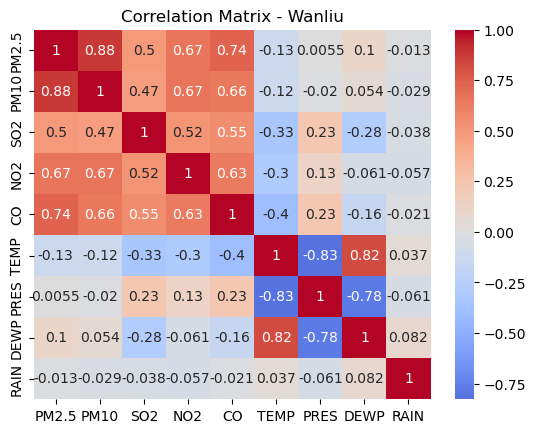

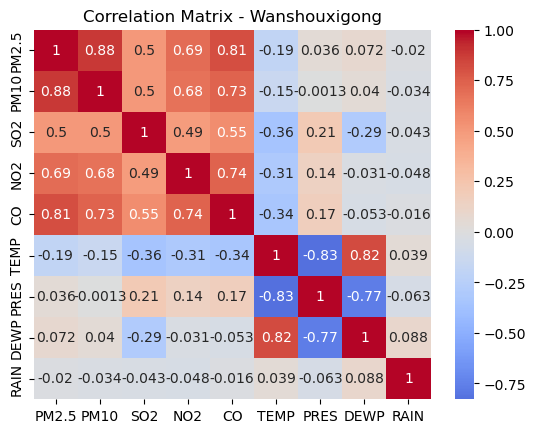

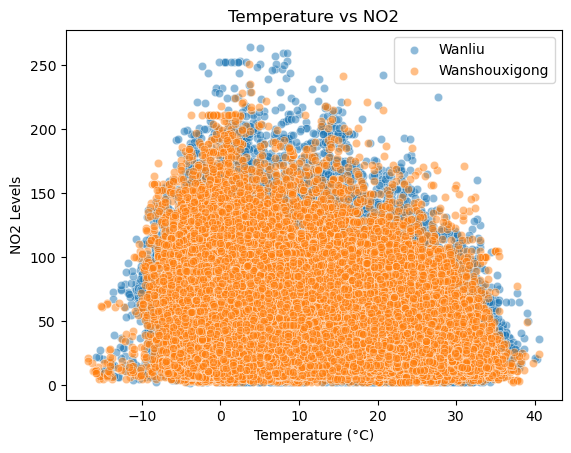

In [20]:
# Correlation heatmap for Wanliu
corr_wanliu = df_wanliu[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
sns.heatmap(corr_wanliu, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Wanliu')
plt.show()

# Correlation heatmap for Wanshouxigong
corr_wanshouxigong = df_wanshouxigong[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
sns.heatmap(corr_wanshouxigong, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Wanshouxigong')
plt.show()

sns.scatterplot(data=df_wanliu, x='TEMP', y='NO2', label='Wanliu', alpha=0.5)
sns.scatterplot(data=df_wanshouxigong, x='TEMP', y='NO2', label='Wanshouxigong', alpha=0.5)
plt.title("Temperature vs NO2")
plt.xlabel("Temperature (°C)")
plt.ylabel("NO2 Levels")
plt.legend()
plt.show()

What are the relationships between weather factors (e.g., temperature, rain) and pollutant concentrations (e.g., NO2, SO2, CO) at each location?
- The correlation heatmaps indicate that temperature has a negative correlation with NO2 and SO2 levels, implying that pollutant levels tend to decrease as temperatures rise, possibly due to reduced fuel combustion for heating.
Rain appears to have a mild negative correlation with pollutant levels, indicating that rain helps in washing away airborne particles and pollutants.

## Analisis Lanjutan (Opsional)

## Conclusion

-  Wanliu seems to suffer from worse air quality compared to Wanshouxigong. This suggests different pollution sources or environmental factors between the two locations.
- Weather conditions like temperature and rain influence pollutant concentrations, suggesting the need for targeted pollution control measures during colder months and dry weather periods.